In [1]:
#knn implementation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import RandomizedSearchCV, train_test_split , GridSearchCV
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from mlxtend.plotting import plot_confusion_matrix

In [2]:
# Importing dataset
train_data = pd.read_csv("/content/Training.csv")
test_data = pd.read_csv("/content/Testing.csv")

# Getting a general idea of the data
train_data


,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,(vertigo) Paroymsal Positional Vertigo,NaN
4916,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,Acne,NaN
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Urinary tract infection,NaN
4918,0,1,0,0,0,0,1,0,0,0,...,0,1,1,1,1,0,0,0,Psoriasis,NaN


In [3]:
if 'Unnamed: 133' in train_data.columns:
    train_data = train_data.drop(['Unnamed: 133'], axis=1)
else:
    print("Column 'Unnamed: 133' not found in the DataFrame.")

In [4]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
itching,4920.0,0.137805,0.344730,0.0,0.0,0.0,0.0,1.0
skin_rash,4920.0,0.159756,0.366417,0.0,0.0,0.0,0.0,1.0
nodal_skin_eruptions,4920.0,0.021951,0.146539,0.0,0.0,0.0,0.0,1.0
continuous_sneezing,4920.0,0.045122,0.207593,0.0,0.0,0.0,0.0,1.0
shivering,4920.0,0.021951,0.146539,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
small_dents_in_nails,4920.0,0.023171,0.150461,0.0,0.0,0.0,0.0,1.0
inflammatory_nails,4920.0,0.023171,0.150461,0.0,0.0,0.0,0.0,1.0
blister,4920.0,0.023171,0.150461,0.0,0.0,0.0,0.0,1.0
red_sore_around_nose,4920.0,0.023171,0.150461,0.0,0.0,0.0,0.0,1.0


In [5]:
# Checking for other missing values
train_data.isna().sum()

,0
itching,0
skin_rash,0
nodal_skin_eruptions,0
continuous_sneezing,0
shivering,0
...,...
inflammatory_nails,0
blister,0
red_sore_around_nose,0
yellow_crust_ooze,0


In [6]:
# Testing split
x_test = test_data.drop(["prognosis"], axis = 1)
y_test = test_data["prognosis"]

# Training split
x_train = train_data.drop(["prognosis"], axis = 1)
y_train = train_data["prognosis"]

# Standardize the features
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [7]:
# Fitting the knn algorithm
knn = KNeighborsClassifier()
n_neighbours = {'n_neighbors': [1, 3, 5, 7, 9], 'metric': ['euclidean', 'manhattan', 'chebyshev']}
grid_knn = GridSearchCV(knn, n_neighbours, cv = 6, n_jobs = -1)
grid_knn.fit(x_train, y_train)

# Selecting the best model
best_knn_model = grid_knn.best_estimator_
print(best_knn_model)

# Get the predicted result of the best model
y_pred_knn=best_knn_model.predict(x_test)

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:1103: UserWarning: One or more of the test scores are non-finite: [1.         1.         1.         1.         0.99878049        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan]
  warnings.warn(


KNeighborsClassifier(metric='euclidean', n_neighbors=1)


In [8]:
# Checking the accuracy of the model
ac_knn = accuracy_score(y_test, y_pred_knn)
print("Accuracy score for model " f'{best_knn_model} : ',ac_knn)
cr_knn = classification_report(y_test, y_pred_knn)
print("classification_report for model " f'{best_knn_model} : \n',cr_knn)

Accuracy score for model KNeighborsClassifier(metric='euclidean', n_neighbors=1) :  0.9761904761904762
classification_report for model KNeighborsClassifier(metric='euclidean', n_neighbors=1) : 
                                          precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00         1
                                   AIDS       1.00      1.00      1.00         1
                                   Acne       1.00      1.00      1.00         1
                    Alcoholic hepatitis       1.00      1.00      1.00         1
                                Allergy       1.00      1.00      1.00         1
                              Arthritis       1.00      1.00      1.00         1
                       Bronchial Asthma       1.00      1.00      1.00         1
                   Cervical spondylosis       1.00      1.00      1.00         1
                            Chicken pox       1.00      1.00      1.00     

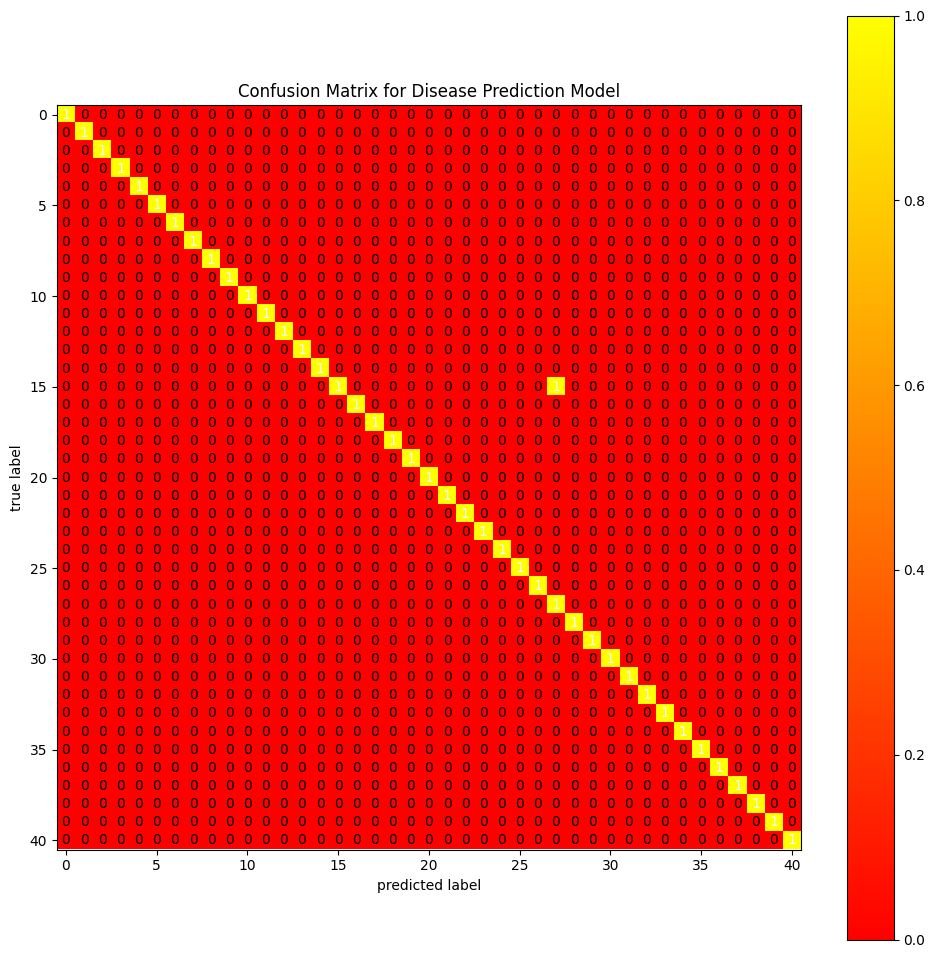

In [9]:
# Confusion Matrix
cm_best_model = confusion_matrix(y_test, y_pred_knn)
fig, ax = plot_confusion_matrix(conf_mat=cm_best_model ,
                                show_absolute=True,
                                colorbar=True,
                                cmap='autumn',
                               figsize=(12, 12))
plt.title("Confusion Matrix for Disease Prediction Model")
plt.show()

In [10]:
#random forest
import numpy as np
import pandas as pd

# Load the training and testing datasets
train = pd.read_csv(r"/content/Training.csv")
test = pd.read_csv(r"/content/Testing.csv")

# Display the first few rows of the training and testing data for inspection
train.head()
test.head()

# Drop the "Unnamed: 133" column from the training set, as it's not useful for modeling
train = train.drop(["Unnamed: 133"], axis=1)

# Check the distribution of the "prognosis" column to see how many cases of each condition exist
train.prognosis.value_counts()

# Check for missing values in both training and testing datasets
train.isna().sum()
test.isna().sum()

,0
itching,0
skin_rash,0
nodal_skin_eruptions,0
continuous_sneezing,0
shivering,0
...,...
inflammatory_nails,0
blister,0
red_sore_around_nose,0
yellow_crust_ooze,0


In [11]:
P = train[["prognosis"]]
X = train.drop(["prognosis"], axis=1)
# Separate the features in the test set, excluding the "prognosis" column
Y = test.drop(["prognosis"], axis=1)
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, P, test_size=0.2, random_state=42)

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier(random_state=42)
model_rf = rf.fit(xtrain, ytrain)
tr_pred_rf = model_rf.predict(xtrain)
ts_pred_rf = model_rf.predict(xtest)
print("training accuracy is:", accuracy_score(ytrain, tr_pred_rf))
print("testing accuracy is:", accuracy_score(ytest, ts_pred_rf))
# The new column "predicted" holds the model's predictions alongside the actual "prognosis"
test.join(pd.DataFrame(model_rf.predict(Y), columns=["predicted"]))[["prognosis", "predicted"]]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


training accuracy is: 1.0
testing accuracy is: 1.0


,prognosis,predicted
0,Fungal infection,Fungal infection
1,Allergy,Allergy
2,GERD,GERD
3,Chronic cholestasis,Chronic cholestasis
4,Drug Reaction,Drug Reaction
5,Peptic ulcer diseae,Peptic ulcer diseae
6,AIDS,AIDS
7,Diabetes,Diabetes
8,Gastroenteritis,Gastroenteritis
9,Bronchial Asthma,Bronchial Asthma
